In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, plot_confusion_matrix, matthews_corrcoef

from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
tele_data = pd.read_csv('train.csv')
tele_data.head()

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,1,Female,0,No,No,34,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,2,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,3,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,4,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [3]:
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591 entries, 0 to 3590
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           3591 non-null   int64  
 1   Gender          3591 non-null   object 
 2   Senior          3591 non-null   int64  
 3   Married         3591 non-null   object 
 4   Dependents      3591 non-null   object 
 5   Tenure          3591 non-null   int64  
 6   Phone           3591 non-null   object 
 7   MultiplePhones  3591 non-null   object 
 8   Internet        3591 non-null   object 
 9   Security        3591 non-null   object 
 10  Backup          3591 non-null   object 
 11  Insurance       3591 non-null   object 
 12  Support         3591 non-null   object 
 13  TV              3591 non-null   object 
 14  Movies          3591 non-null   object 
 15  Contract        3591 non-null   object 
 16  EBilling        3591 non-null   object 
 17  PaymentMethod   3591 non-null   o

In [4]:
#Посмотрим внимательно на каждый признак
#Gender - пол (male / female)
tele_data.Gender.value_counts()

Male      1836
Female    1755
Name: Gender, dtype: int64

In [5]:
tele_data = tele_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
tele_data.head()

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,Yes,Yes,67,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,1,0,0,No,No,34,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,2,0,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,3,0,0,Yes,Yes,63,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,4,1,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [6]:
#Senior - пенсионер или нет (1, 0)
tele_data.Senior.value_counts()

0    3029
1     562
Name: Senior, dtype: int64

In [7]:
#Married - состоит ли в браке (Yes, No)
tele_data.Married.value_counts()

No     1850
Yes    1741
Name: Married, dtype: int64

In [8]:
tele_data = tele_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
tele_data.head()

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,Yes,67,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,1,0,0,0,No,34,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,2,0,1,1,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,3,0,0,1,Yes,63,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,4,1,0,1,Yes,69,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [9]:
#!!!Dependents - служащий или нет (Yes, No)
tele_data.Dependents.value_counts()

No     2511
Yes    1080
Name: Dependents, dtype: int64

In [10]:
tele_data = tele_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
tele_data.head()

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,67,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,1,0,0,0,0,34,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,2,0,1,1,0,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,3,0,0,1,1,63,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,4,1,0,1,1,69,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [11]:
#Tenure - сколько месяцев человек является клиентом компании
tele_data.Tenure.value_counts()

1     317
72    181
2     115
3     113
4      94
     ... 
59     28
36     28
28     26
44     22
0       6
Name: Tenure, Length: 73, dtype: int64

In [12]:
#Phone - подключен ли телефон (Yes, No)
tele_data.Phone.value_counts()

Yes    3234
No      357
Name: Phone, dtype: int64

In [13]:
tele_data = tele_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
tele_data.head()

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,67,0,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,1,0,0,0,0,34,1,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,2,0,1,1,0,72,1,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,3,0,0,1,1,63,1,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,4,1,0,1,1,69,1,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [14]:
#MultiplePhone - подключено ли несколько телефонных каналов (Yes, No, No phone service)
tele_data.MultiplePhones.value_counts()

No                  1735
Yes                 1499
No phone service     357
Name: MultiplePhones, dtype: int64

In [15]:
tele_data = tele_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : 0}})
tele_data.head()

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,67,0,0,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,1,0,0,0,0,34,1,1,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,2,0,1,1,0,72,1,1,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,3,0,0,1,1,63,1,0,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,4,1,0,1,1,69,1,1,Fiber optic,No,...,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [16]:
#Internet - предоставляются ли услуги интернет соединения (DSL, Fiber optic, No)
tele_data.Internet.value_counts()

Fiber optic    1565
DSL            1247
No              779
Name: Internet, dtype: int64

In [17]:
#Security - подключен ли сервис интернет-безопасности (Yes, No, No internet service)
tele_data.Security.value_counts()

No                     1787
Yes                    1025
No internet service     779
Name: Security, dtype: int64

In [18]:
tele_data = tele_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data.head()

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,67,0,0,DSL,1,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,1,0,0,0,0,34,1,1,DSL,1,...,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,2,0,1,1,0,72,1,1,Fiber optic,1,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,3,0,0,1,1,63,1,0,DSL,1,...,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,4,1,0,1,1,69,1,1,Fiber optic,0,...,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [19]:
#Backup - активирована ли служба онлайн-резервного копирования (Yes, No, No internet service)
tele_data.Backup.value_counts()

No                     1591
Yes                    1221
No internet service     779
Name: Backup, dtype: int64

In [20]:
tele_data = tele_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data.head()

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,67,0,0,DSL,1,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,1,0,0,0,0,34,1,1,DSL,1,...,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,2,0,1,1,0,72,1,1,Fiber optic,1,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,3,0,0,1,1,63,1,0,DSL,1,...,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,4,1,0,1,1,69,1,1,Fiber optic,0,...,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [21]:
#Insurance - есть ли у клиента страховка оборудования (Yes, No, No internet service)
tele_data.Insurance.value_counts()

No                     1597
Yes                    1215
No internet service     779
Name: Insurance, dtype: int64

In [22]:
tele_data = tele_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data.head()

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,67,0,0,DSL,1,...,1,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,1,0,0,0,0,34,1,1,DSL,1,...,0,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,2,0,1,1,0,72,1,1,Fiber optic,1,...,1,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,3,0,0,1,1,63,1,0,DSL,1,...,1,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,4,1,0,1,1,69,1,1,Fiber optic,0,...,1,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [23]:
#Support - подключена ли служба технической поддержки (Yes, No, No internet service)
tele_data.Support.value_counts()

No                     1773
Yes                    1039
No internet service     779
Name: Support, dtype: int64

In [24]:
tele_data = tele_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data.head()

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,67,0,0,DSL,1,...,1,1,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,1,0,0,0,0,34,1,1,DSL,1,...,0,1,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,2,0,1,1,0,72,1,1,Fiber optic,1,...,1,1,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,3,0,0,1,1,63,1,0,DSL,1,...,1,1,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,4,1,0,1,1,69,1,1,Fiber optic,0,...,1,0,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [25]:
#TV - подключена ли служба потокового телевидения (Yes, No, No internet service)
tele_data.TV.value_counts()

No                     1433
Yes                    1379
No internet service     779
Name: TV, dtype: int64

In [26]:
tele_data = tele_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data.head()

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,67,0,0,DSL,1,...,1,1,1,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,1,0,0,0,0,34,1,1,DSL,1,...,0,1,0,No,One year,Yes,Mailed check,64.40,2088.75,True
2,2,0,1,1,0,72,1,1,Fiber optic,1,...,1,1,0,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,3,0,0,1,1,63,1,0,DSL,1,...,1,1,0,No,Two year,No,Mailed check,63.55,4014.2,False
4,4,1,0,1,1,69,1,1,Fiber optic,0,...,1,0,1,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [27]:
#Movies - активирован ли сервис потокового кино (Yes, No, No internet service)
tele_data.Movies.value_counts()

No                     1437
Yes                    1375
No internet service     779
Name: Movies, dtype: int64

In [28]:
tele_data = tele_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data.head()

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,67,0,0,DSL,1,...,1,1,1,0,Two year,No,Credit card (automatic),54.20,3623.95,False
1,1,0,0,0,0,34,1,1,DSL,1,...,0,1,0,0,One year,Yes,Mailed check,64.40,2088.75,True
2,2,0,1,1,0,72,1,1,Fiber optic,1,...,1,1,0,0,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,3,0,0,1,1,63,1,0,DSL,1,...,1,1,0,0,Two year,No,Mailed check,63.55,4014.2,False
4,4,1,0,1,1,69,1,1,Fiber optic,0,...,1,0,1,0,One year,No,Credit card (automatic),95.75,6511.25,False


In [29]:
#Contract - тип клиентского контракта (Month-to-month, One year, Two year)
tele_data.Contract.value_counts()

Month-to-month    1971
Two year           857
One year           763
Name: Contract, dtype: int64

In [30]:
#EBilling - использует ли клиент безбумажный биллинг (Yes, No)
tele_data.EBilling.value_counts()

Yes    2136
No     1455
Name: EBilling, dtype: int64

In [31]:
tele_data = tele_data.replace({'EBilling': {'Yes' : 1, 'No' : 0}})
tele_data.head()

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,67,0,0,DSL,1,...,1,1,1,0,Two year,0,Credit card (automatic),54.20,3623.95,False
1,1,0,0,0,0,34,1,1,DSL,1,...,0,1,0,0,One year,1,Mailed check,64.40,2088.75,True
2,2,0,1,1,0,72,1,1,Fiber optic,1,...,1,1,0,0,Two year,1,Bank transfer (automatic),96.60,6827.5,False
3,3,0,0,1,1,63,1,0,DSL,1,...,1,1,0,0,Two year,0,Mailed check,63.55,4014.2,False
4,4,1,0,1,1,69,1,1,Fiber optic,0,...,1,0,1,0,One year,0,Credit card (automatic),95.75,6511.25,False


In [32]:
#PaymentMethod - способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
tele_data.PaymentMethod.value_counts()

Electronic check             1191
Mailed check                  852
Credit card (automatic)       792
Bank transfer (automatic)     756
Name: PaymentMethod, dtype: int64

In [33]:
#MonthlyCharges - текущий ежемесячный платеж
tele_data.MonthlyCharges.value_counts()

20.05     30
19.55     28
19.85     26
19.70     25
19.95     24
          ..
22.95      1
88.55      1
73.25      1
72.25      1
100.10     1
Name: MonthlyCharges, Length: 1293, dtype: int64

In [34]:
#TotalCharges - общая сумма, которую клиент заплатил за услуги за все время
tele_data.TotalCharges.value_counts()

20.2       6
           6
19.55      6
45.3       4
19.9       4
          ..
1815.3     1
6914.95    1
3930.6     1
3066.45    1
2854.55    1
Name: TotalCharges, Length: 3425, dtype: int64

In [35]:
#Видно 6 пустых значений. Меняем на 0
tele_data.TotalCharges = tele_data.TotalCharges.replace(' ', 0)
tele_data.TotalCharges.value_counts()

0          6
19.55      6
20.2       6
20.3       4
19.9       4
          ..
1815.3     1
6914.95    1
3930.6     1
3066.45    1
1396.9     1
Name: TotalCharges, Length: 3425, dtype: int64

In [36]:
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591 entries, 0 to 3590
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           3591 non-null   int64  
 1   Gender          3591 non-null   int64  
 2   Senior          3591 non-null   int64  
 3   Married         3591 non-null   int64  
 4   Dependents      3591 non-null   int64  
 5   Tenure          3591 non-null   int64  
 6   Phone           3591 non-null   int64  
 7   MultiplePhones  3591 non-null   int64  
 8   Internet        3591 non-null   object 
 9   Security        3591 non-null   int64  
 10  Backup          3591 non-null   int64  
 11  Insurance       3591 non-null   int64  
 12  Support         3591 non-null   int64  
 13  TV              3591 non-null   int64  
 14  Movies          3591 non-null   int64  
 15  Contract        3591 non-null   object 
 16  EBilling        3591 non-null   int64  
 17  PaymentMethod   3591 non-null   o

In [37]:
tele_data.head()

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,...,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,67,0,0,DSL,1,...,1,1,1,0,Two year,0,Credit card (automatic),54.20,3623.95,False
1,1,0,0,0,0,34,1,1,DSL,1,...,0,1,0,0,One year,1,Mailed check,64.40,2088.75,True
2,2,0,1,1,0,72,1,1,Fiber optic,1,...,1,1,0,0,Two year,1,Bank transfer (automatic),96.60,6827.5,False
3,3,0,0,1,1,63,1,0,DSL,1,...,1,1,0,0,Two year,0,Mailed check,63.55,4014.2,False
4,4,1,0,1,1,69,1,1,Fiber optic,0,...,1,0,1,0,One year,0,Credit card (automatic),95.75,6511.25,False


In [38]:
#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(tele_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)
data_dummy

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Security,Backup,...,MonthlyCharges,TotalCharges,Churn,Internet_Fiber optic,Internet_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,67,0,0,1,1,...,54.20,3623.95,False,0,0,0,1,1,0,0
1,1,0,0,0,0,34,1,1,1,1,...,64.40,2088.75,True,0,0,1,0,0,0,1
2,2,0,1,1,0,72,1,1,1,1,...,96.60,6827.5,False,1,0,0,1,0,0,0
3,3,0,0,1,1,63,1,0,1,1,...,63.55,4014.2,False,0,0,0,1,0,0,1
4,4,1,0,1,1,69,1,1,0,1,...,95.75,6511.25,False,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,3586,0,0,0,0,5,1,0,0,0,...,80.20,384.25,False,1,0,0,0,0,1,0
3587,3587,0,0,1,1,71,1,0,1,0,...,77.55,5574.35,False,0,0,0,1,1,0,0
3588,3588,0,0,1,0,68,1,1,0,1,...,86.45,5762.95,False,1,0,1,0,1,0,0
3589,3589,0,0,1,1,12,1,0,0,0,...,58.35,740.55,False,0,0,0,0,1,0,0


<AxesSubplot:>

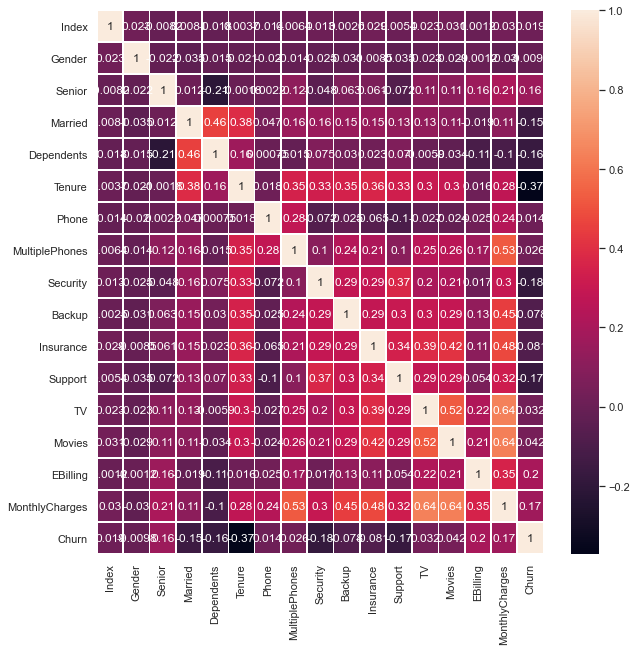

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(tele_data.corr(method='spearman'), annot = True, linewidths=0.7, ax=ax )

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)
scaled_data.head()
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591 entries, 0 to 3590
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Index                                  3591 non-null   float64
 1   Gender                                 3591 non-null   float64
 2   Senior                                 3591 non-null   float64
 3   Married                                3591 non-null   float64
 4   Dependents                             3591 non-null   float64
 5   Tenure                                 3591 non-null   float64
 6   Phone                                  3591 non-null   float64
 7   MultiplePhones                         3591 non-null   float64
 8   Security                               3591 non-null   float64
 9   Backup                                 3591 non-null   float64
 10  Insurance                              3591 non-null   float64
 11  Supp

In [41]:
names

['Index',
 'Gender',
 'Senior',
 'Married',
 'Dependents',
 'Tenure',
 'Phone',
 'MultiplePhones',
 'Security',
 'Backup',
 'Insurance',
 'Support',
 'TV',
 'Movies',
 'EBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'Internet_Fiber optic',
 'Internet_No',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [42]:
standard_transformer = Pipeline(steps=[
        ('standard', StandardScaler())])

minmax_transformer = Pipeline(steps=[
        ('minmax', MinMaxScaler())])


preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('std', standard_transformer , ['Index']),
            ('mm', minmax_transformer , list(set(names) - set(['Index', 'Churn'])))
        ])
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('std',
                                 Pipeline(steps=[('standard',
                                                  StandardScaler())]),
                                 ['Index']),
                                ('mm',
                                 Pipeline(steps=[('minmax', MinMaxScaler())]),
                                 ['Contract_Two year', 'Senior', 'TotalCharges',
                                  'Tenure', 'EBilling', 'Support', 'Married',
                                  'Security', 'Phone', 'MonthlyCharges',
                                  'PaymentMethod_Electronic check', 'Insurance',
                                  'PaymentMethod_Credit card (automatic)',
                                  'Backup', 'Internet_Fiber optic',
                                  'Internet_No', 'Dependents', 'MultiplePhones',
                                  'Movies', 'PaymentMethod_Mailed check',
          

In [43]:
X, Y = scaled_data.drop('Churn', axis=1), scaled_data['Churn']

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
clf.fit(X_train, Y_train)
print("model score: %.3f" % clf.score(X_test, Y_test))
from sklearn.metrics import mean_squared_error as MSE

y_pred = clf.predict(X_test)
print(np.sqrt(MSE(Y_test, y_pred)))

model score: 0.282
0.3778400387578537


In [44]:
clf_predictions = clf.predict(X_train)

clf_predictions

array([ 0.161,  0.233,  0.007, ..., -0.079,  0.405,  0.416])

In [47]:
print (classification_report(Y_test, clf.predict(X_test)))
plot_confusion_matrix(estimator=clf, X= X_test, y_true=Y_test)
print (matthews_corrcoef(Y_test, clf.predict(X_test)))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [48]:
X, Y = scaled_data.drop('Churn', axis=1), scaled_data['Churn']

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
clf.fit(X_train, Y_train)
print("model score: %.3f" % clf.score(X_test, Y_test))
from sklearn.metrics import mean_squared_error as MSE

y_pred = clf.predict(X_test)
print(np.sqrt(MSE(Y_test, y_pred)))

model score: 0.788
0.45989431713313694


              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       783
         1.0       0.63      0.55      0.59       295

    accuracy                           0.79      1078
   macro avg       0.73      0.71      0.72      1078
weighted avg       0.78      0.79      0.78      1078

0.4466192030117559


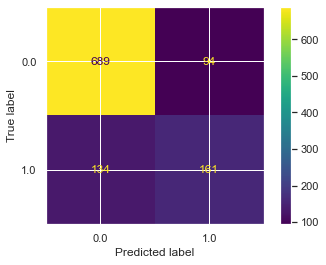

In [49]:
print (classification_report(Y_test, clf.predict(X_test)))
plot_confusion_matrix(estimator=clf, X= X_test, y_true=Y_test)
print (matthews_corrcoef(Y_test, clf.predict(X_test)))

In [50]:
submission = pd.DataFrame(y_pred, columns=['Churn'])
submission['Index'] = submission.index
submission = submission[["Index", "Churn"]]
submission = submission.replace({'Churn': {0: False, 1: True}})
submission.sample(100)

,Index,Churn
186,186,True
948,948,True
149,149,False
956,956,False
799,799,False
...,...,...
98,98,False
569,569,False
642,642,True
164,164,False


In [51]:
submission.value_counts()

Index  Churn
1077   False    1
353    False    1
367    False    1
366    False    1
365    False    1
               ..
713    False    1
712    False    1
711    False    1
710    False    1
0      False    1
Length: 1078, dtype: int64

In [52]:
submission

,Index,Churn
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
1073,1073,False
1074,1074,False
1075,1075,False
1076,1076,False


In [53]:
submission.to_csv('first_submission.csv', index=False)

In [54]:
#Копируем сюда все, что сделали с тренировочными данными
test_data = pd.read_csv('test.csv')
test_data = test_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
test_data = test_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : 0}})
test_data = test_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'EBilling': {'Yes' : 1, 'No' : 0}})
test_data.TotalCharges = test_data.TotalCharges.replace(' ', 0)

#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(test_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)

In [55]:
clf.predict(scaled_data)

array([0., 1., 0., ..., 1., 1., 0.])

In [56]:
submission = pd.DataFrame(clf.predict(scaled_data), columns=['Churn'])
submission['Index'] = submission.index
submission = submission[["Index", "Churn"]]
submission = submission.replace({'Churn': {0: False, 1: True}})
submission.sample(100)

,Index,Churn
2106,2106,False
797,797,False
1878,1878,False
2211,2211,False
1722,1722,True
...,...,...
246,246,False
1212,1212,False
377,377,False
2161,2161,False


In [57]:
submission

,Index,Churn
0,0,False
1,1,True
2,2,False
3,3,False
4,4,True
...,...,...
2390,2390,False
2391,2391,False
2392,2392,True
2393,2393,True


In [58]:
submission.to_csv('first_submission.csv', index=False)

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [60]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [61]:
vclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
vclf.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('gnb', GaussianNB())],
                 voting='soft')

In [63]:
submission = pd.DataFrame(vclf.predict(scaled_data), columns=['Churn'])
submission['Index'] = submission.index
submission = submission[["Index", "Churn"]]
submission = submission.replace({'Churn': {0: False, 1: True}})
submission.sample(100)

,Index,Churn
1817,1817,False
1054,1054,True
925,925,True
888,888,True
1349,1349,True
...,...,...
2101,2101,False
1235,1235,False
2230,2230,False
491,491,False


In [64]:
submission

,Index,Churn
0,0,False
1,1,True
2,2,False
3,3,True
4,4,True
...,...,...
2390,2390,False
2391,2391,False
2392,2392,True
2393,2393,True


In [65]:
submission.to_csv('second_submission.csv', index=False)

In [74]:
#Попробуем отделить No internet service
tele_data = pd.read_csv('train.csv')
tele_data = tele_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
tele_data = tele_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : 2}})
tele_data = tele_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : 2}})
tele_data = tele_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : 2}})
tele_data = tele_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : 2}})
tele_data = tele_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : 2}})
tele_data = tele_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : 2}})
tele_data = tele_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : 2}})
tele_data = tele_data.replace({'EBilling': {'Yes' : 1, 'No' : 2}})
tele_data.TotalCharges = tele_data.TotalCharges.replace(' ', 0)

#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(tele_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)

In [75]:
X, Y = scaled_data.drop('Churn', axis=1), scaled_data['Churn']

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
clf.fit(X_train, Y_train)
print("model score: %.3f" % clf.score(X_test, Y_test))
from sklearn.metrics import mean_squared_error as MSE

y_pred = clf.predict(X_test)
print(np.sqrt(MSE(Y_test, y_pred)))

model score: 0.788
0.45989431713313694


In [79]:
#Копируем сюда все, что сделали с тренировочными данными
test_data = pd.read_csv('test.csv')
test_data = test_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
test_data = test_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : 2}})
test_data = test_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : 2}})
test_data = test_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : 2}})
test_data = test_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : 2}})
test_data = test_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : 2}})
test_data = test_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : 2}})
test_data = test_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : 2}})
test_data = test_data.replace({'EBilling': {'Yes' : 1, 'No' : 0}})
test_data.TotalCharges = test_data.TotalCharges.replace(' ', 0)

#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(test_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)


In [80]:
submission = pd.DataFrame(clf.predict(scaled_data), columns=['Churn'])
submission['Index'] = submission.index
submission = submission[["Index", "Churn"]]
submission = submission.replace({'Churn': {0: False, 1: True}})
submission.sample(100)

,Index,Churn
166,166,False
473,473,True
1768,1768,False
1857,1857,True
1330,1330,False
...,...,...
692,692,False
1134,1134,True
139,139,False
685,685,False


In [81]:
submission

,Index,Churn
0,0,False
1,1,False
2,2,False
3,3,False
4,4,True
...,...,...
2390,2390,False
2391,2391,False
2392,2392,True
2393,2393,False


In [82]:
submission.to_csv('third_submission.csv', index=False)

In [84]:
#Попробуем отделить No internet service
tele_data = pd.read_csv('train.csv')
tele_data = tele_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
tele_data = tele_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : 1}})
tele_data = tele_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : 1}})
tele_data = tele_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : 1}})
tele_data = tele_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : 1}})
tele_data = tele_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : 1}})
tele_data = tele_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : 1}})
tele_data = tele_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : 1}})
tele_data = tele_data.replace({'EBilling': {'Yes' : 1, 'No' : 2}})
tele_data.TotalCharges = tele_data.TotalCharges.replace(' ', 0)

#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(tele_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)
X, Y = scaled_data.drop('Churn', axis=1), scaled_data['Churn']

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
clf.fit(X_train, Y_train)
print("model score: %.3f" % clf.score(X_test, Y_test))
from sklearn.metrics import mean_squared_error as MSE

y_pred = clf.predict(X_test)
print(np.sqrt(MSE(Y_test, y_pred)))

#Копируем сюда все, что сделали с тренировочными данными
test_data = pd.read_csv('test.csv')
test_data = test_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
test_data = test_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : 1}})
test_data = test_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : 1}})
test_data = test_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : 1}})
test_data = test_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : 1}})
test_data = test_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : 1}})
test_data = test_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : 1}})
test_data = test_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : 1}})
test_data = test_data.replace({'EBilling': {'Yes' : 1, 'No' : 0}})
test_data.TotalCharges = test_data.TotalCharges.replace(' ', 0)

#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(test_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)

submission = pd.DataFrame(clf.predict(scaled_data), columns=['Churn'])
submission['Index'] = submission.index
submission = submission[["Index", "Churn"]]
submission = submission.replace({'Churn': {0: False, 1: True}})
submission.sample(100)

submission.to_csv('fourth_submission.csv', index=False)

model score: 0.788
0.45989431713313694


In [96]:
#Попробуем отделить No internet service
tele_data = pd.read_csv('train.csv')
tele_data = tele_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
tele_data = tele_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : 0}})
tele_data = tele_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'EBilling': {'Yes' : 1, 'No' : 2}})
tele_data.TotalCharges = tele_data.TotalCharges.replace(' ', 0)

#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(tele_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)
X, Y = scaled_data.drop('Churn', axis=1), scaled_data['Churn']

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=3000, random_state=2))])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
clf.fit(X_train, Y_train)
print("model score: %.3f" % clf.score(X_test, Y_test))
from sklearn.metrics import mean_squared_error as MSE

y_pred = clf.predict(X_test)
print(np.sqrt(MSE(Y_test, y_pred)))

#Копируем сюда все, что сделали с тренировочными данными
test_data = pd.read_csv('test.csv')
test_data = test_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
test_data = test_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : 0}})
test_data = test_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'EBilling': {'Yes' : 1, 'No' : 0}})
test_data.TotalCharges = test_data.TotalCharges.replace(' ', 0)

#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(test_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)

submission = pd.DataFrame(clf.predict(scaled_data), columns=['Churn'])
submission['Index'] = submission.index
submission = submission[["Index", "Churn"]]
submission = submission.replace({'Churn': {0: False, 1: True}})
submission.sample(100)

submission.to_csv('sixth_submission.csv', index=False)

model score: 0.778
0.4708575841632026


In [101]:
#Попробуем отделить No internet service
tele_data = pd.read_csv('train.csv')
tele_data = tele_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
tele_data = tele_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : 0}})
tele_data = tele_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'EBilling': {'Yes' : 1, 'No' : 2}})
tele_data.TotalCharges = tele_data.TotalCharges.replace(' ', 0)

#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(tele_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)
X, Y = scaled_data.drop('Churn', axis=1), scaled_data['Churn']

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=3000, random_state=2))])
vclf = VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier(n_estimators=300, random_state=2))], voting='soft')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
vclf.fit(X_train, Y_train)
print("model score: %.3f" % vclf.score(X_test, Y_test))
from sklearn.metrics import mean_squared_error as MSE

y_pred = vclf.predict(X_test)
print(np.sqrt(MSE(Y_test, y_pred)))

#Копируем сюда все, что сделали с тренировочными данными
test_data = pd.read_csv('test.csv')
test_data = test_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
test_data = test_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : 0}})
test_data = test_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'EBilling': {'Yes' : 1, 'No' : 0}})
test_data.TotalCharges = test_data.TotalCharges.replace(' ', 0)

#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(test_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)

submission = pd.DataFrame(vclf.predict(scaled_data), columns=['Churn'])
submission['Index'] = submission.index
submission = submission[["Index", "Churn"]]
submission = submission.replace({'Churn': {0: False, 1: True}})
submission.sample(100)

submission.to_csv('seventh_submission.csv', index=False)

model score: 0.786
0.4629100498862757


In [112]:
df = pd.DataFrame(np.random.choice(a = [False, True],size=(2395, 1)), columns=['Churn'])
df['Index'] = df.index

In [113]:
df

,Churn,Index
0,True,0
1,True,1
2,False,2
3,True,3
4,False,4
...,...,...
2390,True,2390
2391,True,2391
2392,True,2392
2393,True,2393


In [115]:
submission.to_csv('eight_submission.csv', index=False)

In [116]:
from catboost import CatBoostClassifier, Pool

CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)

In [123]:
from catboost import CatBoostRegressor

tele_data = pd.read_csv('train.csv')
tele_data = tele_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
tele_data = tele_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : -1}})
tele_data = tele_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
tele_data = tele_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
tele_data = tele_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
tele_data = tele_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
tele_data = tele_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
tele_data = tele_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
tele_data = tele_data.replace({'EBilling': {'Yes' : 1, 'No' : 2}})
tele_data.TotalCharges = tele_data.TotalCharges.replace(' ', 0)

#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(tele_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)
X, Y = scaled_data.drop('Churn', axis=1), scaled_data['Churn']

vclf = CatBoostRegressor(iterations=10,
                          learning_rate=1,
                          depth=4)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
vclf.fit(X_train, Y_train)
print("model score: %.3f" % vclf.score(X_test, Y_test))
from sklearn.metrics import mean_squared_error as MSE

y_pred = vclf.predict(X_test)
print(np.sqrt(MSE(Y_test, y_pred)))

#Копируем сюда все, что сделали с тренировочными данными
test_data = pd.read_csv('test.csv')
test_data = test_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
test_data = test_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : -1}})
test_data = test_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
test_data = test_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
test_data = test_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
test_data = test_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
test_data = test_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
test_data = test_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
test_data = test_data.replace({'EBilling': {'Yes' : 1, 'No' : 0}})
test_data.TotalCharges = test_data.TotalCharges.replace(' ', 0)

#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(test_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)

submission = pd.DataFrame(vclf.predict(scaled_data), columns=['Churn'])
submission['Index'] = submission.index
submission = submission[["Index", "Churn"]]
submission = submission.replace({'Churn': {0: False, 1: True}})
submission.sample(100)

submission.to_csv('tenth_submission.csv', index=False)

0:	learn: 0.3842542	total: 770us	remaining: 6.94ms
1:	learn: 0.3740162	total: 1.91ms	remaining: 7.64ms
2:	learn: 0.3699873	total: 2.81ms	remaining: 6.55ms
3:	learn: 0.3661162	total: 3.69ms	remaining: 5.53ms
4:	learn: 0.3625074	total: 4.56ms	remaining: 4.56ms
5:	learn: 0.3606247	total: 5.44ms	remaining: 3.62ms
6:	learn: 0.3583702	total: 6.35ms	remaining: 2.72ms
7:	learn: 0.3569945	total: 7.29ms	remaining: 1.82ms
8:	learn: 0.3557246	total: 8.15ms	remaining: 906us
9:	learn: 0.3534160	total: 9.08ms	remaining: 0us
model score: 0.274
0.37986510686105296


model score: 0.789
0.4588846686767468
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       783
         1.0       0.63      0.55      0.59       295

    accuracy                           0.79      1078
   macro avg       0.74      0.72      0.72      1078
weighted avg       0.78      0.79      0.78      1078

0.4505760582923567


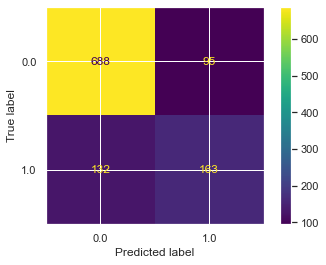

In [142]:
tele_data = pd.read_csv('train.csv')
tele_data = tele_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
tele_data = tele_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : -1}})
tele_data = tele_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
tele_data = tele_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
tele_data = tele_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
tele_data = tele_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
tele_data = tele_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
tele_data = tele_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
tele_data = tele_data.replace({'EBilling': {'Yes' : 1, 'No' : 0}})
tele_data.TotalCharges = tele_data.TotalCharges.replace(' ', 0)

#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(tele_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)
X, Y = scaled_data.drop('Churn', axis=1), scaled_data['Churn']

vclf = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
vclf.fit(X_train, Y_train)
print("model score: %.3f" % vclf.score(X_test, Y_test))
from sklearn.metrics import mean_squared_error as MSE

y_pred = vclf.predict(X_test)
print(np.sqrt(MSE(Y_test, y_pred)))

#Копируем сюда все, что сделали с тренировочными данными
test_data = pd.read_csv('test.csv')
test_data = test_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
test_data = test_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : -1}})
test_data = test_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
test_data = test_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
test_data = test_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
test_data = test_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
test_data = test_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
test_data = test_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : -1}})
test_data = test_data.replace({'EBilling': {'Yes' : 1, 'No' : 0}})
test_data.TotalCharges = test_data.TotalCharges.replace(' ', 0)

#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(test_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)

submission = pd.DataFrame(vclf.predict(scaled_data), columns=['Churn'])
submission['Index'] = submission.index
submission = submission[["Index", "Churn"]]
submission = submission.replace({'Churn': {0: False, 1: True}})
submission.sample(100)

submission.to_csv('tenth_submission.csv', index=False)

print (classification_report(Y_test, vclf.predict(X_test)))
plot_confusion_matrix(estimator=vclf, X= X_test, y_true=Y_test)
print (matthews_corrcoef(Y_test, vclf.predict(X_test)))

model score: 0.842
0.45380273271834154
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.86       783
         1.0       0.67      0.50      0.57       295

    accuracy                           0.79      1078
   macro avg       0.75      0.70      0.72      1078
weighted avg       0.78      0.79      0.78      1078

0.4459315460215573


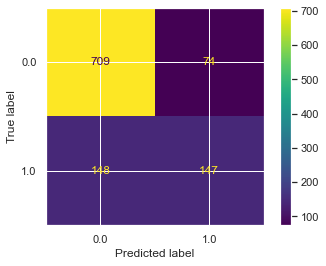

In [152]:
from sklearn.ensemble import GradientBoostingClassifier

tele_data = pd.read_csv('train.csv')
tele_data = tele_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
tele_data = tele_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
tele_data = tele_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : 0}})
tele_data = tele_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
tele_data = tele_data.replace({'EBilling': {'Yes' : 1, 'No' : 0}})
tele_data.TotalCharges = tele_data.TotalCharges.replace(' ', 0)

#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(tele_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)
X, Y = scaled_data.drop('Churn', axis=1), scaled_data['Churn']

from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
X_test_dummies = pd.get_dummies(X_test, drop_first = True)
X_train_dummies = pd.get_dummies(X_train, drop_first = True)

gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
cv = GridSearchCV(gbc, parameters,cv=5, scoring='roc_auc', n_jobs=-1)
vclf = cv.fit(X_train_dummies, Y_train)
vclf.fit(X_train, Y_train)
print("model score: %.3f" % vclf.score(X_test, Y_test))
from sklearn.metrics import mean_squared_error as MSE

y_pred = vclf.predict(X_test)
print(np.sqrt(MSE(Y_test, y_pred)))

#Копируем сюда все, что сделали с тренировочными данными
test_data = pd.read_csv('test.csv')
test_data = test_data.replace({'Gender': {'Male' : 1, 'Female' : 0}})
test_data = test_data.replace({'Married': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Dependents': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'Phone': {'Yes' : 1, 'No' : 0}})
test_data = test_data.replace({'MultiplePhones': {'Yes' : 1, 'No' : 0, 'No phone service' : 0}})
test_data = test_data.replace({'Security': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Backup': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Insurance': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Support': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'TV': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'Movies': {'Yes' : 1, 'No' : 0, 'No internet service' : 0}})
test_data = test_data.replace({'EBilling': {'Yes' : 1, 'No' : 0}})
test_data.TotalCharges = test_data.TotalCharges.replace(' ', 0)

#Возьмем те признаки, которые не "да/нет" и сделаем из них dummy data (категориальные)
data_dummy = pd.get_dummies(test_data, columns = {'Internet', 'Contract', 'PaymentMethod'}, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = scaler.fit_transform(data_dummy)

names = list(data_dummy)
scaled_data = pd.DataFrame(d, columns=names)

submission = pd.DataFrame(vclf.predict(scaled_data), columns=['Churn'])
submission['Index'] = submission.index
submission = submission[["Index", "Churn"]]
submission = submission.replace({'Churn': {0: False, 1: True}})
submission.sample(100)

submission.to_csv('thirteenth_submission.csv', index=False)

print (classification_report(Y_test, vclf.predict(X_test)))
plot_confusion_matrix(estimator=vclf, X= X_test, y_true=Y_test)
print (matthews_corrcoef(Y_test, vclf.predict(X_test)))


In [153]:
submission.to_csv('thirteenth_submission.csv', index=False)